In [90]:
import numpy as np
import cv2
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [128]:
train_messy = "images/train/messy"
train_clean= "images/train/clean"
test_messy= "images/val/messy"
test_clean= "images/val/clean"
image_size = 128

100%|██████████| 96/96 [00:00<00:00, 156.75it/s]


Text(0.5, 1.0, 'Messy and Clean Rooms in GrayScale')

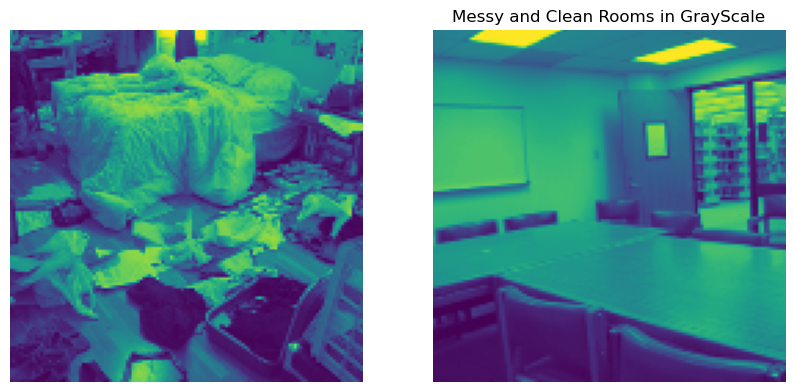

In [129]:
for image in tqdm(os.listdir(train_messy)): 
    path = os.path.join(train_messy, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)
    
for image2 in tqdm(os.listdir(train_clean)): 
    path = os.path.join(train_clean, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
    np_img2=np.asarray(img2)

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("Messy and Clean Rooms in GrayScale")

In [130]:
def train_data():
    train_data_messy = [] 
    train_data_clean=[]
    for image1 in tqdm(os.listdir(train_messy)): 
        path = os.path.join(train_messy, image)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(train_clean)): 
        path = os.path.join(train_clean, image)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_clean.append(img2) 
    
    train_data= np.concatenate((np.asarray(train_data_messy),np.asarray(train_data_clean)),axis=0)
    return train_data 

In [131]:
def test_data():
    test_data_messy = [] 
    test_data_clean=[]
    for image1 in tqdm(os.listdir(test_messy)): 
        path = os.path.join(test_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(test_clean)): 
        if image2[0] == ".":
            continue
        path = os.path.join(test_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_clean.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_messy),np.asarray(test_data_clean)),axis=0) 
    return test_data 

In [132]:
train_data = train_data() 
test_data = test_data()

100%|██████████| 11/11 [00:00<00:00, 174.48it/s]


In [133]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [134]:
z1 = np.zeros(96)
o1 = np.ones(96)
Y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(10)
o = np.ones(10)
Y_test = np.concatenate((o, z), axis=0)

In [135]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [136]:
x_data.shape,y_data.shape

((212, 128, 128), (212, 1))

In [137]:
X = x_data.reshape(x_data.shape[0],x_data.shape[1]*x_data.shape[2])

In [138]:
X,y

(array([[0.56862745, 0.16078431, 0.34509804, ..., 0.31372549, 0.17647059,
         0.06666667],
        [0.56862745, 0.16078431, 0.34509804, ..., 0.31372549, 0.17647059,
         0.06666667],
        [0.56862745, 0.16078431, 0.34509804, ..., 0.31372549, 0.17647059,
         0.06666667],
        ...,
        [0.58039216, 0.54901961, 0.52156863, ..., 0.27843137, 0.28627451,
         0.28627451],
        [0.55686275, 0.55686275, 0.55686275, ..., 0.52156863, 0.49803922,
         0.49411765],
        [0.60784314, 0.60784314, 0.61568627, ..., 0.50980392, 0.49019608,
         0.49803922]]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1

In [139]:
from sklearn.svm import SVC

In [142]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [143]:
model = SVC()

In [144]:
model.fit(X_train,y_train)

SVC()

In [146]:
model.score(X_test,y_test)

0.9428571428571428